In [258]:
import pandas as pd
import numpy as np
import math
import ipywidgets as widgets
import ml_utils

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
plt.rcParams["figure.figsize"] = (8,8)

In [259]:
df = pd.read_csv("data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [260]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [261]:
class edaDF:
    def __init__(self, data, target):
        self.data = data
        self.target = target
        self.cat = []
        self.num = []

    def info(self):
        return self.data.info()

    def giveTarget(self):
        return self.target
        
    def setCat(self, catList):
        self.cat = catList
    
    def setNum(self, numList):
        self.num = numList
    
    def cat_to_numeric(self, data, columnName, current_val, desired_val):
        data[columnName].replace({current_val: desired_val}, inplace=True)
        return self.data.head()
        
    def pair(self, data):
        plot = sns.pairplot(self.data, hue=None)
        plt.show()
        return plot
        
    def numericstats(self, data):
        d = print('Nulls:\n\n\n', self.data.isna().sum())
        val = data.value_counts().T
        sort = print('Value Counts:\n\n\n',val.sort_values(ascending=False))
        desc = print('Full description:\n\n\n ', df.describe(include="all"))
        return d, sort, desc

    def quicklook(self, data):
        head = print('Head:\n', self.data.head())
        tail = print('Tail:\n', self.data.tail())
        val = data.value_counts().T
        sort = print('Value Counts:\n',val.sort_values(ascending=False))
        desc = print('Full description:\n ', df.describe(include="all"))
        return head, tail, sort, desc

    def heatmap(self, data):
        df2 = self.data.apply(pd.to_numeric, errors='coerce')
        df2 = self.data.corr()
        plt.rcParams["figure.figsize"] = (20,10)
        h = sns.heatmap(df)
        plt.show()
        return h 

    def hists(self, data, show=True):
        figure = self.data.hist()
        if show == True:
            figure.show()
        return figure

    def fullEDA(self, data):
        out1 = widgets.Output()
        out2 = widgets.Output()
        out3 = widgets.Output()
        out4 = widgets.Output()

        tab = widgets.Tab(children = [out1, out2, out3, out4])
        tab.set_title(0, 'Info')
        tab.set_title(1, 'Numeric Stats')
        tab.set_title(2, 'Correlations')
        tab.set_title(3, 'Hists')
        display(tab)

        with out1:
            self.data.info()

        with out2:
            self.data.numericstats()
        
        with out3:
            fig3 = self.data.pair()
            plt.show(fig3)
        
        with out4:
            fig4 = self.data.hists(show=False)
            plt.show(fig4)



In [262]:
df_eda = edaDF(df,"HeartDisease")
cat = df_eda.setCat(['ChestPainType', 'RestingECG', 'ST_Slope'])
num = df_eda.setNum(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ExerciseAngina', 'HeartDisease'])

In [263]:
df_eda.cat_to_numeric(df,'Sex', 'M', '1')
df_eda.cat_to_numeric(df,'Sex', 'F', '0')
df_eda.cat_to_numeric(df,'ExerciseAngina', 'N', '0')
df_eda.cat_to_numeric(df,'ExerciseAngina', 'Y', '1')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [264]:
df_eda.numericstats(df)

Nulls:


 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Value Counts:


 Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   1    ATA            130        132          0          LVH         185    0               0.0      Up        0               1
35   1    ATA            120        308          0          LVH         180    0               0.0      Up        0               1
                         110        257          0          Normal      140    0               0.0      Flat      1               1
29   1    ATA            130        204          0          LVH         202    0               0.0      Up        0               1
                         140        263          0          Norma

(None, None, None)

AttributeError: 'numpy.ndarray' object has no attribute 'show'

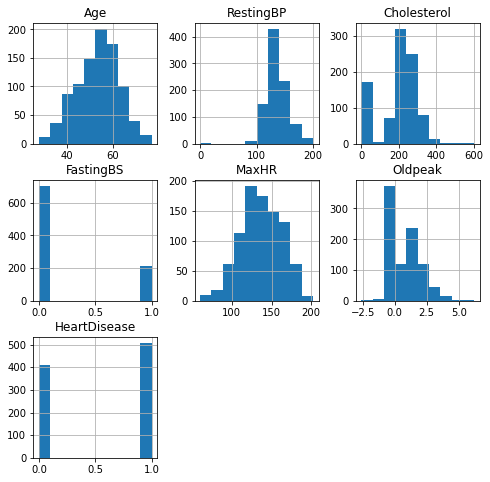

In [265]:
df_eda.hists(df)

In [ ]:
df_eda.fullEDA(df_eda)

In [ ]:
df_eda.quicklook(df)

Head:
    Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   1           ATA        140          289          0     Normal    172   
1   49   0           NAP        160          180          0     Normal    156   
2   37   1           ATA        130          283          0         ST     98   
3   48   0           ASY        138          214          0     Normal    108   
4   54   1           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              0      0.0       Up             0  
1              0      1.0     Flat             1  
2              0      0.0       Up             0  
3              1      1.5     Flat             1  
4              0      0.0       Up             0  
Tail:
      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   1            TA        110          264          0     Normal   
914   68   1           ASY        144    

(None, None, None, None)

In [ ]:
df_eda.isna(num)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df_eda.numericstats(df)

Value Counts:
 Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   1    ATA            130        132          0          LVH         185    0               0.0      Up        0               1
35   1    ATA            120        308          0          LVH         180    0               0.0      Up        0               1
                         110        257          0          Normal      140    0               0.0      Flat      1               1
29   1    ATA            130        204          0          LVH         202    0               0.0      Up        0               1
                         140        263          0          Normal      170    0               0.0      Up        0               1
                                                                                                                                 ..
75   1    ASY            136        225          0          Normal

(None, None)

In [ ]:
df_eda.fullEDA()

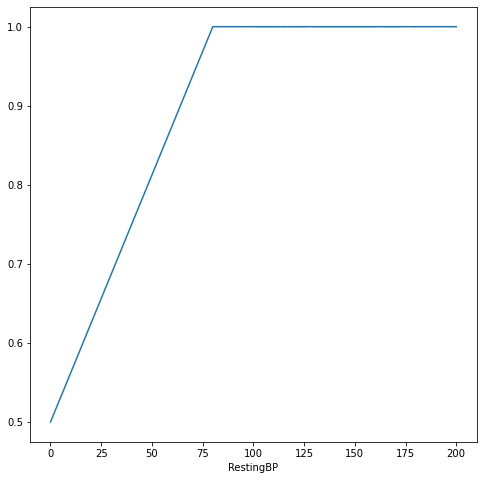

In [ ]:
x = pd.Series(df['RestingBP'])
norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete

sns.lineplot(x=x, y=norm_cdf)
plt.show()

In [ ]:
prob = scipy.stats.probplot(x)
plt.show()

In [ ]:
#This function does the same work as the one we made last time - it does 6 graphs all in bulk: Hist, PMF, CDF, PDF, normal and lognormal prob plots. 
#One addition is the rnd=0 thing. That's how we can make one of those optional paramaters, if you don't provide anything there, the hist will have no
#rounding; if you provide a number, the histogram will round to that many digits. 
def bigGraph(self, data, rnd=0):
    data = pd.Series(data)
    hist = sns.displot(data)
    plt.subplot(2)
    cdf = scipy.stats.norm.cdf(data)
    sns.lineplot(x=x, y=norm_cdf)
    return